<a href="https://colab.research.google.com/github/Daniscarf/test/blob/master/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. a) Usa Pandas para cargar el conjunto de datos. b) Limpia los datos eliminando o imputando los valores nulos. c) Seleccione la característica más adecuada donde se aplique el concepto de datos categóricos y realiza la modificación respectiva en el data set.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

archivo = "/content/drive/MyDrive/calidad.csv"

# Leer el archivo CSV
df = pd.read_csv(archivo, encoding='utf-8')

# Mostrar las primeras filas
print(df)





        fecha   temperatura  humedad  contaminantes    clase
0   2023-01-01         22.5       55             35    bueno
1   2023-01-02         21.0       60             45    bueno
2   2023-01-03         23.0       62             50  regular
3   2023-01-04         24.5       58             80     malo
4   2023-01-05         22.0       63             30    bueno
5   2023-01-06         20.5       65             60  regular
6   2023-01-07         20.5       70             85     malo
7   2023-01-08         19.0       75             40    bueno
8   2023-01-09         25.0       80             90  regular
9   2023-01-10         21.5       55             30     malo
10  2023-01-11         23.5       50             50    bueno
11  2023-01-12         22.0       61             70  regular
12  2023-01-13         24.0       63             55     malo
13  2023-01-14         21.0       54             20    bueno
14  2023-01-15         25.0       59             60  regular
15  2023-01-16         2

2.Después de limpiar los datos, deseas explorar cómo se relacionan las variables a) Un histograma de la temperatura. b) Un gráfico de dispersión que muestre la relación entre la humedad y los contaminantes.
Comenta sobre las tendencias que observas en los gráficos

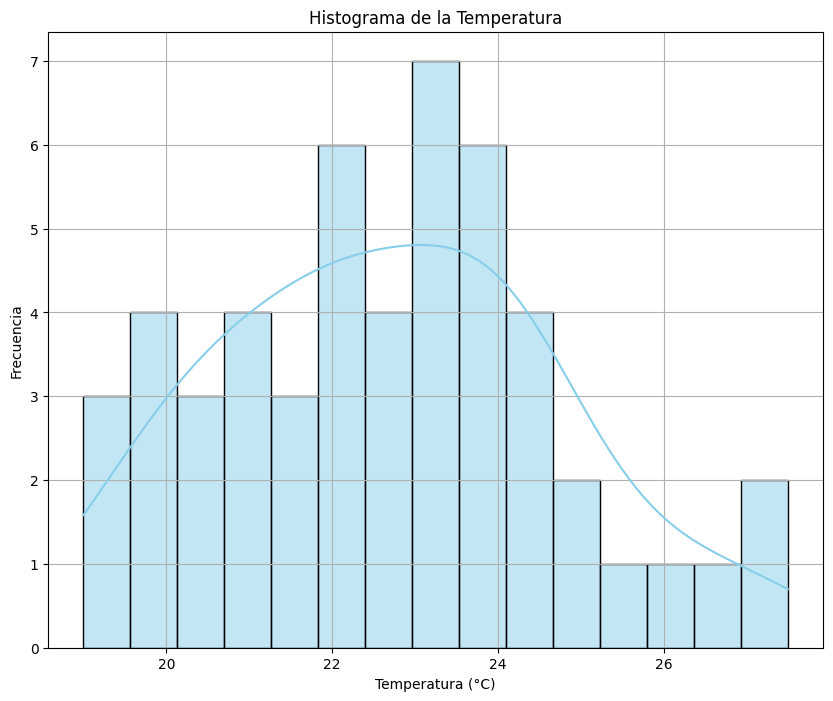

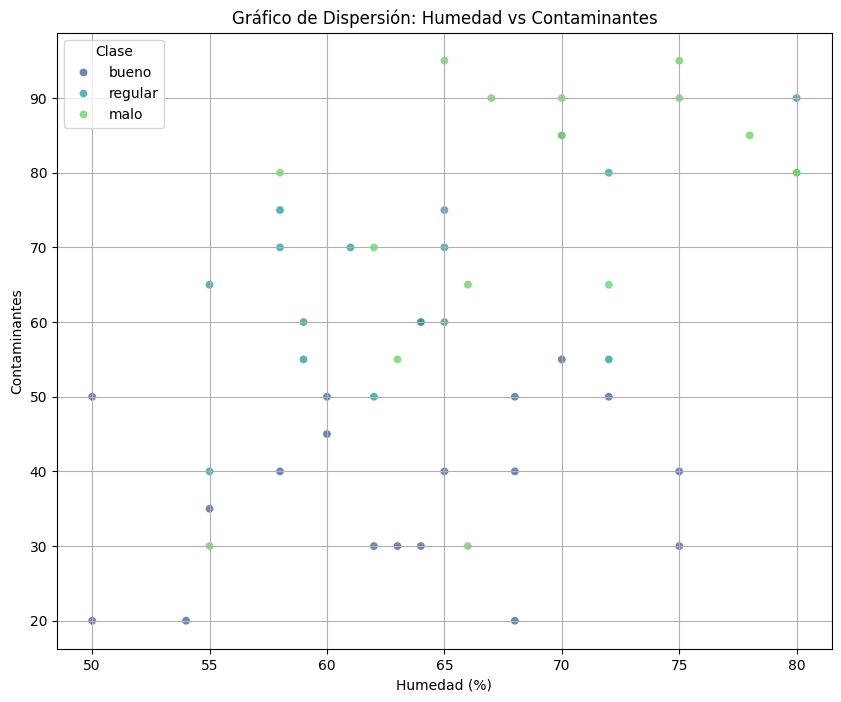

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(df['temperatura'], bins=15, kde=True, color='skyblue')
plt.title('Histograma de la Temperatura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='humedad', y='contaminantes', hue='clase', palette='viridis', alpha=0.7)
plt.title('Gráfico de Dispersión: Humedad vs Contaminantes')
plt.xlabel('Humedad (%)')
plt.ylabel('Contaminantes')
plt.legend(title='Clase')
plt.grid()
plt.show()

3.Antes de entrenar tu red neuronal, necesitas escalar los datos y dividirlos en conjuntos de entrenamiento y prueba
a) Aplica un escalado (StandardScaler de sklearn) a las características numéricas del conjunto de datos. b) Divide el conjunto de datos considerando un 20% para prueba. Describe por qué es importante escalar los datos y dividir el conjunto.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df['temperatura'] = pd.to_numeric(df['temperatura'], errors='coerce')
df['humedad'] = pd.to_numeric(df['humedad'], errors='coerce')
df['contaminantes'] = pd.to_numeric(df['contaminantes'], errors='coerce')
df['fecha'] = pd.to_datetime(df['fecha'])

df['clase'] = df['clase'].astype('category')

X = df[['temperatura', 'humedad', 'contaminantes']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled[:5])
y = df['clase'].cat.codes

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f'Dimensión del conjunto de entrenamiento: {X_train.shape}')
print(f'Dimensión del conjunto de prueba: {X_test.shape}')


[[-0.09359046 -1.34352076 -1.08070696]
 [-0.8317008  -0.68213506 -0.61948474]
 [ 0.15244632 -0.41758078 -0.38887363]
 [ 0.89055665 -0.94668934  0.99479302]
 [-0.33962724 -0.28530364 -1.31131807]]
Dimensión del conjunto de entrenamiento: (40, 3)
Dimensión del conjunto de prueba: (11, 3)


El escalado y la normalización de los datos son cruciales para evitar que las características con rangos más amplios dominen el proceso de entrenamiento de las redes neuronales, garantizando que todas las características contribuyan equitativamente al modelo.

4.	Al analizar el conjunto de datos sobre la calidad del aire, notas que algunas observaciones tienen valores extremos en la columna de contaminantes

a)	Utiliza Pandas para identificar los valores atípicos en la columna contaminantes.
Decide cómo manejar estos valores atípicos: ¿los eliminarás, los imputarás o los dejarás tal cual? Justifica tu decisión.

Valores atípicos:
Empty DataFrame
Columns: [fecha, temperatura, humedad, contaminantes, clase]
Index: []


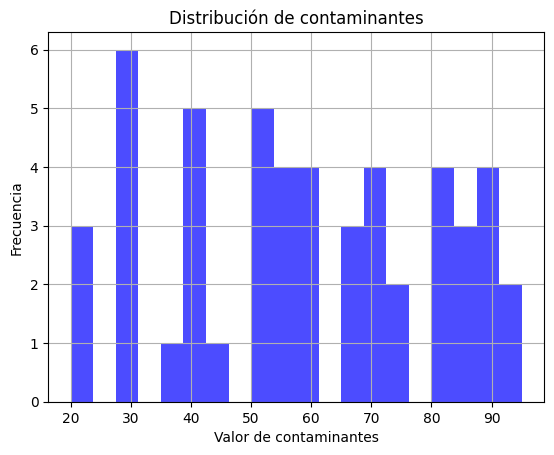

In [ ]:
# Identificar valores atípicos utilizando el rango intercuartil (IQR)
Q1 = df['contaminantes'].quantile(0.25)
Q3 = df['contaminantes'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

valores_atipicos = df[(df['contaminantes'] < limite_inferior) | (df['contaminantes'] > limite_superior)]

print("Valores atípicos:")
print(valores_atipicos)

# Visualización de los datos para verificar la distribución
plt.hist(df['contaminantes'], bins=20, alpha=0.7, color='blue')
plt.title('Distribución de contaminantes')
plt.xlabel('Valor de contaminantes')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Después de realizar el análisis de detección de valores atípicos utilizando el rango intercuartil (IQR), se determinó que no hay valores atípicos en el conjunto de datos. Esto indica que los datos están bien distribuidos y no presentan valores extremos significativos.

5.	Contexto: Una vez que has limpiado los datos, quieres entender cómo se relacionan las variables numéricas entre sí.

a)	Calcula la matriz de correlación utilizando Pandas.
b)	Usa Matplotlib para visualizar la matriz de correlación con un mapa de calor.
Comenta sobre las correlaciones más fuertes que encuentres entre las variables, explicando cómo podrían influir en la calidad del aire.

               temperatura   humedad  contaminantes
temperatura        1.00000 -0.020320       0.183440
humedad           -0.02032  1.000000       0.457874
contaminantes      0.18344  0.457874       1.000000


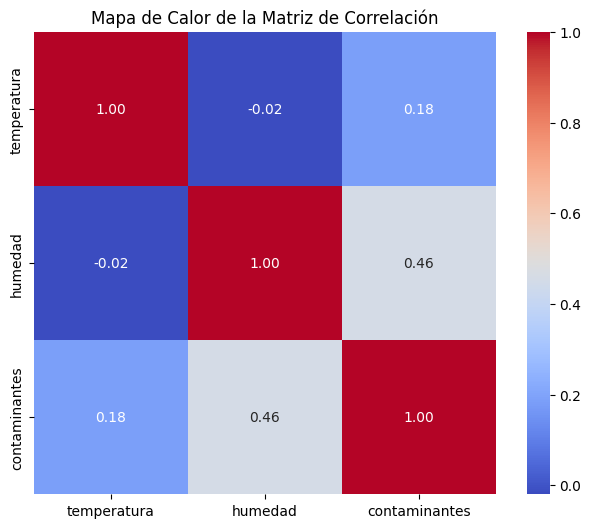

In [ ]:
numerical_df = df.select_dtypes(include=[np.number])

correlation_matrix = numerical_df.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()